In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data using pandas
df=pd.read_csv("data.csv")

In [3]:
#checking the loaded data
df

,timestamp,temp,humidity,ppm
0,2023-06-09T10:46:48+05:30,38,38,24.01
1,2023-06-09T10:47:49+05:30,38,36,22.39
2,2023-06-09T10:48:49+05:30,38,36,21.62
3,2023-06-09T10:49:50+05:30,38,36,21.62
4,2023-06-09T10:50:50+05:30,38,36,21.62
...,...,...,...,...
10303,2023-06-17T02:51:13+05:30,28,32,25.71
10304,2023-06-17T02:52:13+05:30,28,32,25.71
10305,2023-06-17T02:53:14+05:30,28,32,25.71
10306,2023-06-17T02:54:14+05:30,28,32,28.43


In [4]:
#seeing the shape of the data
df.shape

(10308, 4)

In [5]:
# seeing the info of the data where we can see the data datatype of each column and count of non null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10308 entries, 0 to 10307
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  10308 non-null  object 
 1   temp       10308 non-null  int64  
 2   humidity   10308 non-null  int64  
 3   ppm        10308 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 322.2+ KB


In [6]:
#describing the data to see the descriptive statistics of the numerical data that we have
df.describe()

,temp,humidity,ppm
count,10308.000000,10308.000000,10308.000000
mean,38.297051,32.617288,39.145906
std,4.053829,5.793688,18.363310
min,28.000000,21.000000,11.270000
25%,35.000000,29.000000,24.850000
50%,39.000000,32.000000,34.520000
75%,41.000000,36.000000,49.670000
max,45.000000,55.000000,328.600000


In [7]:
#checking the correlation for all the columns
df.corr()

,temp,humidity,ppm
temp,1.000000,-0.291916,0.239798
humidity,-0.291916,1.000000,0.012272
ppm,0.239798,0.012272,1.000000


<AxesSubplot:>

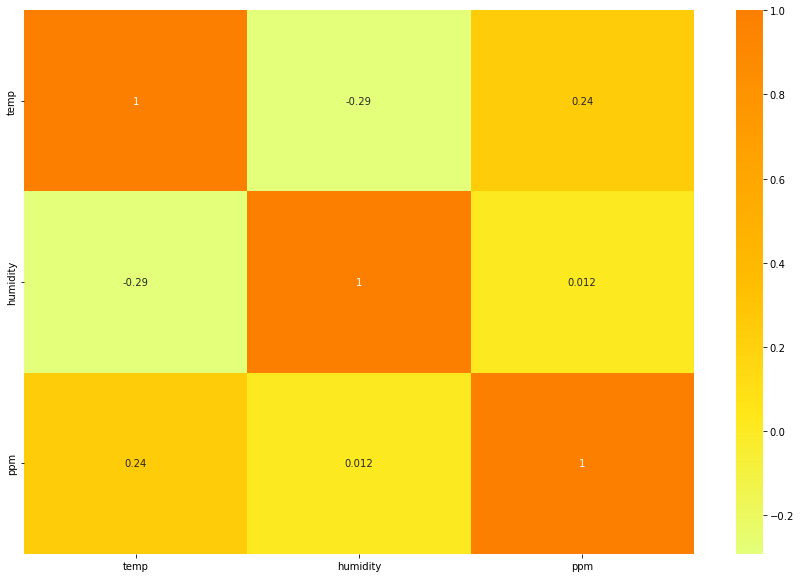

In [8]:
#visualizing the correlation using heatmap to understnd better
correlation=df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap='Wistia')

In [9]:
#formatting the timestamp column to date time column
df.timestamp=pd.to_datetime(df["timestamp"])

In [10]:
#splitting formatted timestamp columm in to in to four different columns it makes easy to for training
df["day"]=df["timestamp"].dt.dayofweek
df["month"]=df["timestamp"].dt.month
df["year"]=df["timestamp"].dt.year
df["time_from_midnight"]=df["timestamp"].dt.hour*60+df["timestamp"].dt.minute

In [11]:
# since the timestamp column divided into four other new columns ,we droping it
df.drop(columns=["timestamp"],inplace=True)

In [12]:
#checking the data frame after droping the column
df

,temp,humidity,ppm,day,month,year,time_from_midnight
0,38,38,24.01,4,6,2023,646
1,38,36,22.39,4,6,2023,647
2,38,36,21.62,4,6,2023,648
3,38,36,21.62,4,6,2023,649
4,38,36,21.62,4,6,2023,650
...,...,...,...,...,...,...,...
10303,28,32,25.71,5,6,2023,171
10304,28,32,25.71,5,6,2023,172
10305,28,32,25.71,5,6,2023,173
10306,28,32,28.43,5,6,2023,174


In [13]:
#here we can observe that year column has only one year in the whole column which is not much required
df['year'].value_counts()

2023    10308
Name: year, dtype: int64

In [14]:
#here we can observe that month column has only one month in the whole column which is not much required
df['month'].value_counts()

6    10308
Name: month, dtype: int64

<AxesSubplot:>

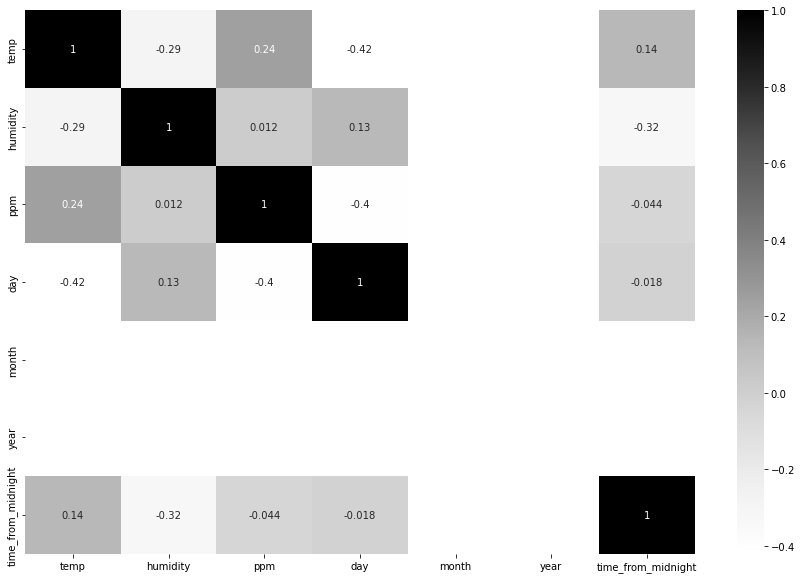

In [24]:
#checking the correlation after adding the new columns
correlation1=df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation1,annot=True,cmap='Greys')

In [25]:
#defining  the independent variables and dependent variable for training
X=df[['temp', 'humidity','day','time_from_midnight']]
y=df["ppm"]

In [26]:
#importing the train test split from sklearn modelselection
from sklearn.model_selection import train_test_split


In [27]:
#splitting the data in to training and testing using trin_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
#importing randomforest algorithm from sklearn.ensemble to train dataset
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)

In [29]:
#fitting the training data to algorithm so that it learns from relationships of data using best fit line
model.fit(X_train,y_train)

RandomForestRegressor()

In [30]:
#testing model using X_test so ,it predicts the values of y_test
y_pred=model.predict(X_test)

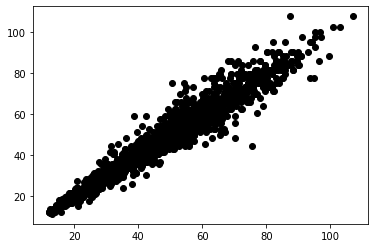

In [35]:
# scattering the points of predicted y_values and origianl y_values ,if all the points are formed near to each other 
#with high density then model found the best fit line well
plt.scatter(y_pred,y_test,c='k')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ppm', ylabel='Density'>

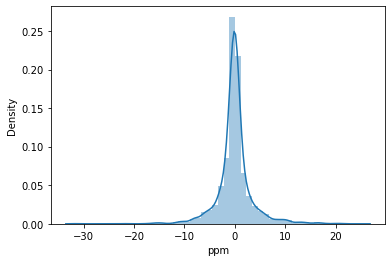

In [37]:
#visualizing the distribution of errors or residuals ,if the distribution is near to normal distribution,means that model fitted well
sns.distplot(y_test-y_pred,kde=True)

In [38]:
#importing the evaluation metrics for evaluating the model how it works
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score

In [39]:
#checking all three important metrics scores
print("mse:",mean_squared_error(y_test,y_pred))
print("mae:",mean_absolute_error(y_test,y_pred))
print("r2:",r2_score(y_test,y_pred))

mse: 12.169901819078563
mae: 2.04364671839638
r2: 0.9627558650027471


In [40]:
#checking the importance of the features and seeing which feature contributes more
feature_importance=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

In [ ]:
#checking the important features column wise rate
feature_importance

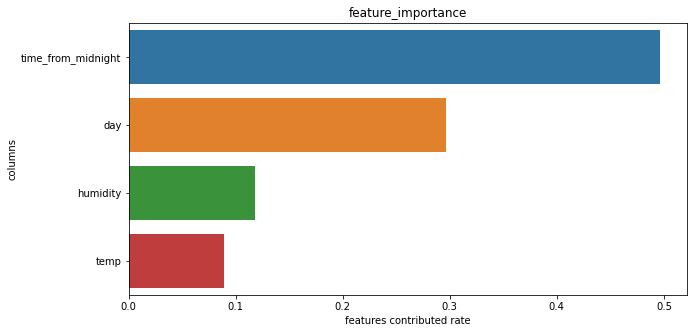

In [41]:
#visualizing the imppoaratance of the features using barplot ,so visual representation can be understood by every one
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance,y=feature_importance.index)
plt.xlabel("features contributed rate")
plt.ylabel("columns")
plt.title("feature_importance")
plt.show()

In [ ]:
#from sklearn.linear_model import LinearRegression

In [ ]:
#lr=LinearRegression()
#lr

In [ ]:
#lr.fit(X_train,y_train)

In [ ]:
#coefficients=pd.DataFrame(lr.coef_,columns=['coefficients_of_each_feature'],index=X.columns)

In [ ]:
#coefficients

In [ ]:
#lr.intercept_

In [ ]:
#y_pred1=lr.predict(X_test)

In [ ]:
#y_pred1

In [ ]:
#y_test

In [ ]:
#plt.scatter(y_pred1,y_test)

In [ ]:
#r2_score(y_pred1,y_test)